<a href="https://colab.research.google.com/github/akashj30/Deep-Learing/blob/main/Handwritten%20Digit%20Classification%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification Project - Akash Jagdale

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Load MNIST dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

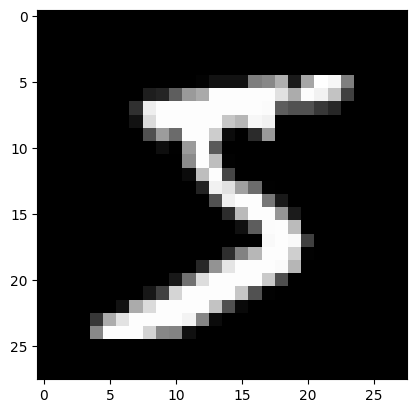

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

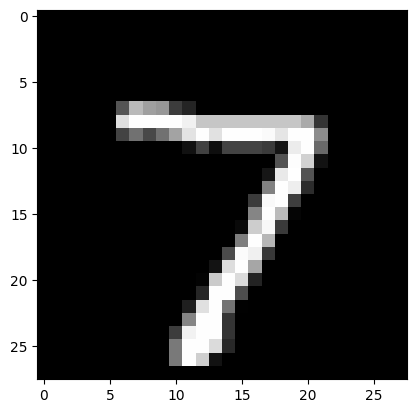

In [12]:
plt.imshow(xtest[0],cmap='gray')

### Display first 9 Images from train data

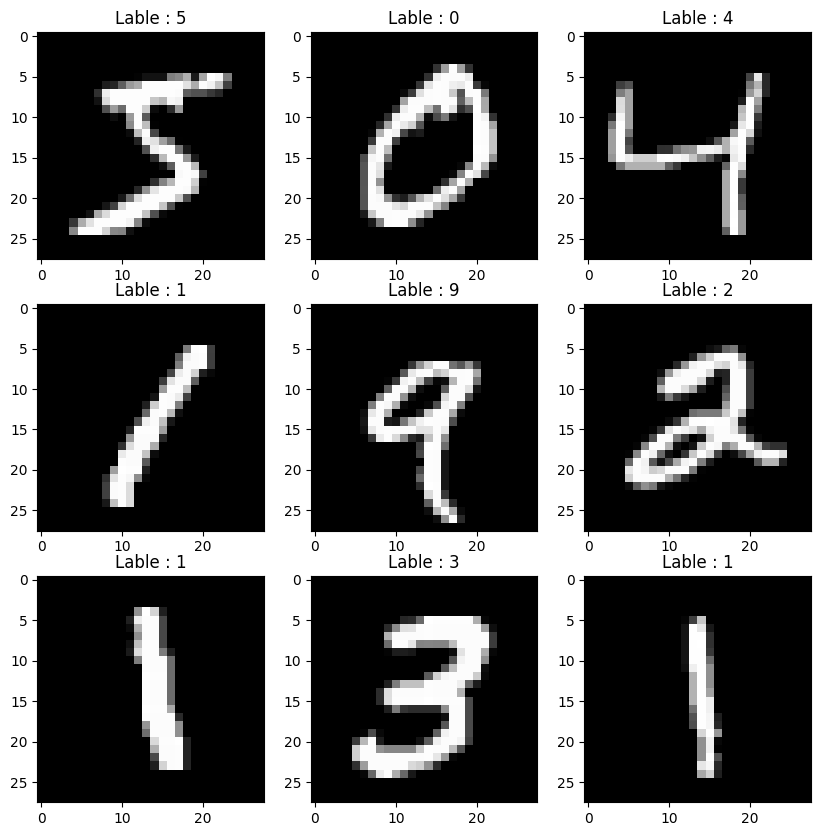

In [14]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f"Lable : {ytrain[i]}")

In [15]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
len(np.unique(ytrain))

10

### Multiclass Classification Problem

Preprocessing Image Data

Pixel Value - 0-255

In [17]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [18]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

OneHot Encode the y Features

In [19]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [20]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build the Neural Network

Simple Covnet architecture



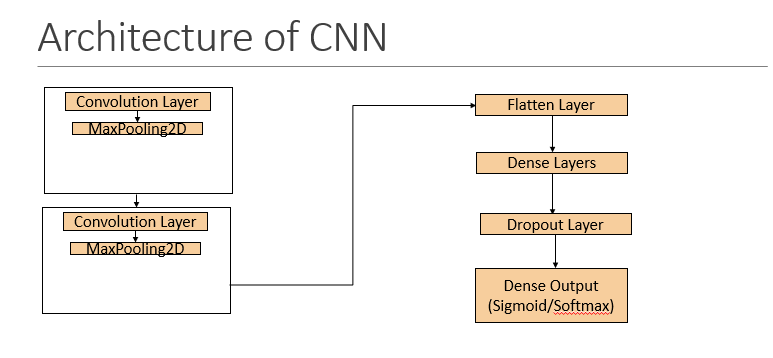

In [26]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dense,Dropout

In [28]:
model = Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

# Add convolutional layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

# Add Max pooling 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add convolutional layer 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# Add Max pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(0.5))

# Outer layer
model.add(Dense(ytrain_cat.shape[1],activation='softmax'))


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
hist = model.fit(xtrain_scl, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 47s 27ms/step - loss: 0.2208 - accuracy: 0.9317 - val_loss: 0.0628 - val_accuracy: 0.9832
Epoch 2/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0856 - accuracy: 0.9730 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 3/15
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0388 - val_accuracy: 0.9903
Epoch 4/15
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 5/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0496 - accuracy: 0.9836 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 6/15
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0339 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0305 -

### Plot the learning curve


<function matplotlib.pyplot.show(close=None, block=None)>

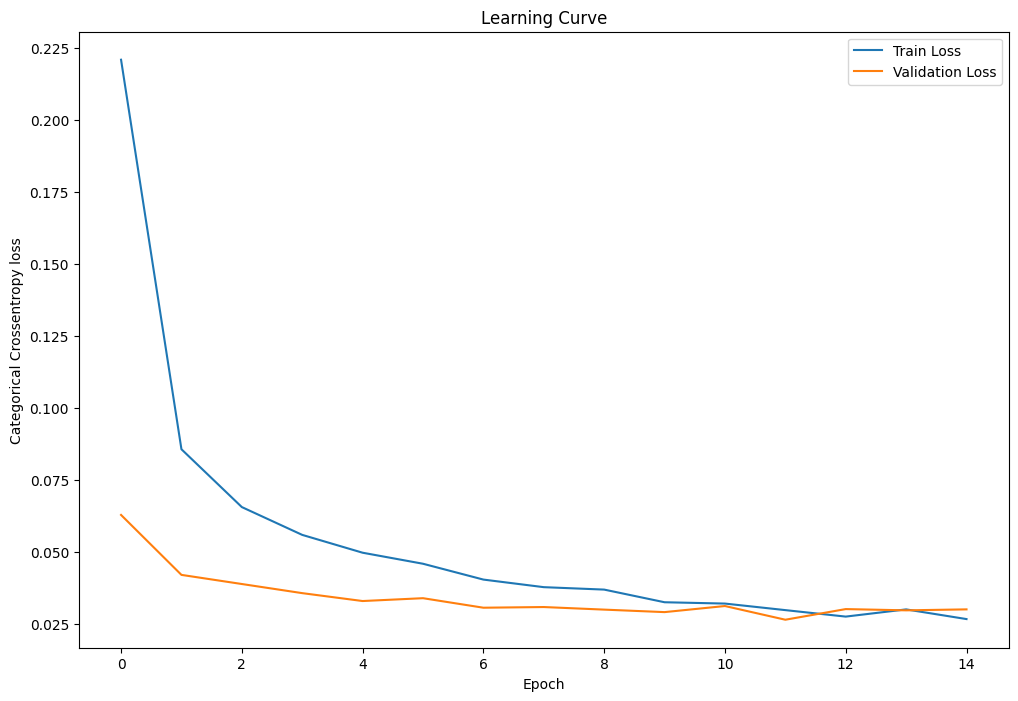

In [33]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label = 'Validation Loss')
plt.title('Learning Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show

### Evaluate the model in train and test


In [34]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0111 - accuracy: 0.9968


[0.011067040264606476, 0.9968000054359436]

In [35]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0229 - accuracy: 0.9928


[0.022899523377418518, 0.9927999973297119]

### Predict results for train and test


In [36]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 3s 10ms/step


In [37]:
yprob_train[0:5]


array([[4.41066411e-12, 3.49935966e-12, 1.04908533e-10, 5.33415005e-04,
        4.98987624e-13, 9.99454379e-01, 5.48985440e-11, 3.42115752e-10,
        2.58146520e-06, 9.72769794e-06],
       [9.99999702e-01, 7.62790061e-18, 1.42057374e-07, 3.75660657e-12,
        1.70682397e-13, 1.67299800e-12, 1.02920204e-07, 3.55708064e-14,
        5.02700903e-09, 7.19037185e-09],
       [1.53926859e-14, 1.42111361e-07, 2.47675622e-08, 4.44910393e-11,
        9.99992430e-01, 8.78019740e-11, 2.02243465e-11, 5.62389459e-07,
        2.44749884e-07, 6.54592213e-06],
       [1.21611095e-08, 9.99979556e-01, 1.28581064e-07, 8.10964837e-11,
        1.53425699e-05, 1.04472775e-09, 6.73129591e-07, 1.71730062e-06,
        2.55002033e-06, 8.34883185e-09],
       [1.15613803e-11, 1.83884700e-12, 9.80330928e-10, 3.13362603e-09,
        6.09789049e-06, 1.94275623e-10, 1.31590729e-13, 6.80564085e-08,
        1.02204040e-05, 9.99983490e-01]], dtype=float32)

In [38]:
yprob_test[0:5]

array([[2.1303226e-10, 4.1686264e-12, 2.4834165e-07, 4.1570743e-08,
        3.6493720e-15, 4.8356362e-12, 4.5715923e-17, 9.9999946e-01,
        1.8624255e-10, 2.7368617e-07],
       [1.5445684e-06, 1.3846504e-06, 9.9999601e-01, 6.4351119e-10,
        2.0632605e-10, 4.3070165e-14, 9.7265161e-07, 1.8061438e-11,
        4.0358348e-09, 1.4514905e-11],
       [2.9244045e-09, 9.9995059e-01, 1.9973665e-08, 2.0400638e-10,
        3.9148617e-05, 4.8659943e-09, 3.5197213e-06, 5.2372475e-06,
        1.3407397e-06, 3.2390421e-08],
       [9.9996060e-01, 2.1701052e-14, 1.4614212e-06, 3.1746414e-10,
        4.3355861e-11, 1.9827776e-07, 3.7031088e-05, 2.4945057e-10,
        1.8970205e-07, 3.4696438e-07],
       [3.5991743e-10, 5.4131602e-14, 1.3603151e-10, 1.7963224e-13,
        9.9998218e-01, 1.6951284e-12, 3.1529315e-10, 2.6124053e-11,
        1.1061609e-09, 1.7753289e-05]], dtype=float32)

In [39]:
import numpy as np
ypred_train  = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [40]:
ypred_train[0:5]


array([5, 0, 4, 1, 9])

In [41]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
ytrain[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [43]:
ypred_test[0:5]


array([7, 2, 1, 0, 4])

In [44]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion Matrix


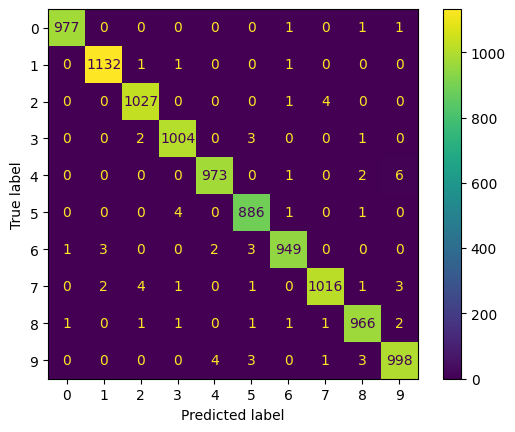

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [46]:

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use


In [50]:
model.save('digit_model.keras')


### Load above model


In [51]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [54]:

# Loading the image
import cv2
img = cv2.imread('/content/example_img.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [55]:
img_scl = img.astype('float32')/255


In [57]:
probs = model.predict(np.array([img_scl]))


1/1 [==============================] - 0s 35ms/step


In [58]:
probs

array([[3.5841912e-19, 1.8645771e-17, 4.4296150e-13, 9.9999988e-01,
        2.5928994e-17, 1.7097572e-07, 3.2484255e-20, 7.1850905e-14,
        3.9521000e-10, 6.2197325e-10]], dtype=float32)

In [59]:
pred = np.argmax(probs)
pred

3

In [60]:
prob = np.max(probs)
prob

0.9999999

In [61]:

def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

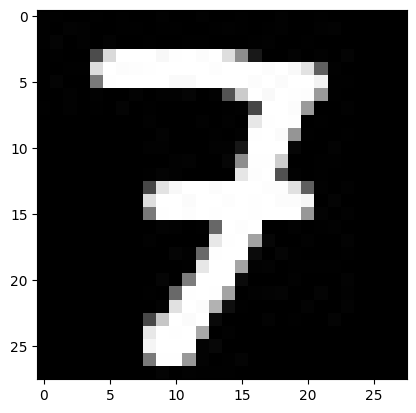

1/1 [==============================] - 0s 34ms/step


(7, 0.99973017)

In [62]:
predict_number('/content/example_img2.jpg')


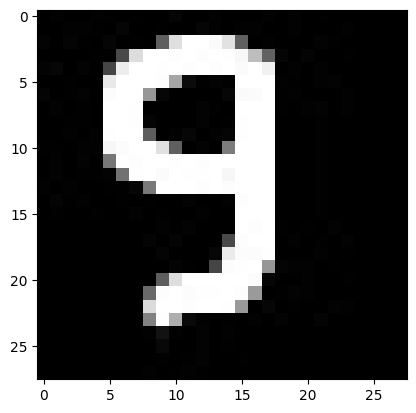

1/1 [==============================] - 0s 34ms/step


(8, 0.50294906)

In [64]:
predict_number('/content/example_img3.jpg')
